# How Player Height Affects the NBA
### Analysis Team
*Lindsay Reynolds, Nick Sheets*

In [1]:
#%matplotlib notebook
#take out the hashtag if we will use this

In [2]:
# Set up dependencies and read in csv files needed
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import stats
from scipy.stats import linregress

In [3]:
# Read in stats csv file from data exploration/cleanup process
player_stats_path = os.path.join("Output_files_for_analysis", "player_stats.csv")

nba_stats_df = pd.read_csv(player_stats_path)
nba_stats_df

,Unnamed: 0,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...,...
743,743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [4]:
# Need to drop the extra column of index
del nba_stats_df["Unnamed: 0"]
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [5]:
# Read in csv file including salary from data exploration/cleanup process
nba_stats_with_salary_path = os.path.join("Output_files_for_analysis", "player_stats_with_sal.csv")
nba_stats_with_salary_df = pd.read_csv(nba_stats_with_salary_path)
nba_stats_with_salary_df

,Unnamed: 0,player_name,height (in),pts,reb,ast,college,country,team,2020-21
0,2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,18136364.0
1,4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,2345640.0
2,6,Abdel Nader,78.0,3.500000,1.700000,0.400000,Iowa State,Egypt,BOS,1752950.0
3,8,Al Horford,82.0,13.500000,6.966667,4.633333,Florida,Dominican Republic,BOS,27500000.0
4,10,Al-Farouq Aminu,81.0,9.133333,7.500000,1.366667,Wake Forest,USA,POR,9720900.0
...,...,...,...,...,...,...,...,...,...,...
319,749,Willie Cauley-Stein,84.0,10.933333,6.633333,1.966667,Kentucky,USA,SAC,4000000.0
320,758,Yuta Watanabe,81.0,2.600000,2.100000,0.500000,George Washington,Japan,MEM,321893.0
321,759,Zach Collins,84.0,5.500000,3.750000,0.850000,Gonzaga,USA,POR,5406255.0
322,760,Zach LaVine,77.0,19.766667,4.000000,3.500000,UCLA,USA,MIN,19500000.0


In [6]:
# Need to drop the extra column of index
del nba_stats_with_salary_df["Unnamed: 0"]
nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21
0,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,18136364.0
1,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,2345640.0
2,Abdel Nader,78.0,3.500000,1.700000,0.400000,Iowa State,Egypt,BOS,1752950.0
3,Al Horford,82.0,13.500000,6.966667,4.633333,Florida,Dominican Republic,BOS,27500000.0
4,Al-Farouq Aminu,81.0,9.133333,7.500000,1.366667,Wake Forest,USA,POR,9720900.0
...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.0,10.933333,6.633333,1.966667,Kentucky,USA,SAC,4000000.0
320,Yuta Watanabe,81.0,2.600000,2.100000,0.500000,George Washington,Japan,MEM,321893.0
321,Zach Collins,84.0,5.500000,3.750000,0.850000,Gonzaga,USA,POR,5406255.0
322,Zach LaVine,77.0,19.766667,4.000000,3.500000,UCLA,USA,MIN,19500000.0


### Data Analysis

In [7]:
players = nba_stats_df["player_name"].unique()
print(len(players))

748


In [8]:
# See general analysis of the stats df including min and max heights
nba_stats_df.describe()

,height (in),pts,reb,ast
count,748.000000,748.000000,748.000000,748.000000
mean,78.868940,7.201604,3.089260,1.617313
std,3.355998,5.464155,2.237994,1.574468
min,69.000000,0.000000,0.000000,0.000000
25%,76.000000,3.300000,1.500000,0.600000
50%,79.000000,5.800000,2.583333,1.100000
75%,81.000000,9.475000,3.950000,2.100000
max,87.000000,31.866667,15.133333,10.466667


In [9]:
# Look at some more stats, including unique values for college and country
nba_stats_df.describe(include="all")

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
count,748,748.000000,748.000000,748.000000,748.000000,748,748,748,748
unique,748,NaN,NaN,NaN,NaN,161,50,30,6
top,Cody Zeller,NaN,NaN,NaN,NaN,None,USA,ATL,"6'7"" - 6'9"""
freq,1,NaN,NaN,NaN,NaN,149,589,30,233
mean,NaN,78.868940,7.201604,3.089260,1.617313,NaN,NaN,NaN,NaN
std,NaN,3.355998,5.464155,2.237994,1.574468,NaN,NaN,NaN,NaN
min,NaN,69.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,76.000000,3.300000,1.500000,0.600000,NaN,NaN,NaN,NaN
50%,NaN,79.000000,5.800000,2.583333,1.100000,NaN,NaN,NaN,NaN
75%,NaN,81.000000,9.475000,3.950000,2.100000,NaN,NaN,NaN,NaN


In [10]:
# Binning the heights
group_names = ["<= 6ft", "6'1\" - 6'3\"", "6'4\" - 6'6\"", "6'7\" - 6'9\"", "6'10\" - 7'", "> 7ft"]
bins = [0, 72, 75, 78, 81, 84, 87]

nba_stats_df["Height Range"] = pd.cut(nba_stats_df["height (in)"], bins, labels=group_names)
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [11]:
binning_nba_heights_df = nba_stats_df.groupby(by = "Height Range").count()["height (in)"].to_frame()

binning_nba_heights_df = binning_nba_heights_df.rename(columns={'height (in)':'player_count'})
binning_nba_heights_df

,player_count
Height Range,
<= 6ft,22
"6'1"" - 6'3""",109
"6'4"" - 6'6""",202
"6'7"" - 6'9""",233
"6'10"" - 7'",161
> 7ft,21


In [12]:
# Update the format of percentages in the following
pd.options.display.float_format = "{:.2f}%".format

In [13]:
# Show number of players for each Height bin and also the percentage of total
binning_nba_heights_df["perc_of_players"] = binning_nba_heights_df / len(players) * 100
binning_nba_heights_df

,player_count,perc_of_players
Height Range,,
<= 6ft,22,2.94%
"6'1"" - 6'3""",109,14.57%
"6'4"" - 6'6""",202,27.01%
"6'7"" - 6'9""",233,31.15%
"6'10"" - 7'",161,21.52%
> 7ft,21,2.81%


In [14]:
pd.options.display.float_format = "{:.2f}".format

In [15]:
# Binning the salaries
group_names_salary = ["< 1M", "1M to 2.4M", "2.5M to 4.9M", "5M to 9.9M", "10M to 19.9M", "> 20M"]
bins_salary = [0, 1000000, 2500000, 5000000, 10000000, 20000000, 30000000]

nba_stats_with_salary_df["Salary Range"] = pd.cut(nba_stats_with_salary_df["2020-21"],\
                                                  bins_salary, labels=group_names_salary)
nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21,Salary Range
0,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,18136364.00,10M to 19.9M
1,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,2345640.00,1M to 2.4M
2,Abdel Nader,78.00,3.50,1.70,0.40,Iowa State,Egypt,BOS,1752950.00,1M to 2.4M
3,Al Horford,82.00,13.50,6.97,4.63,Florida,Dominican Republic,BOS,27500000.00,> 20M
4,Al-Farouq Aminu,81.00,9.13,7.50,1.37,Wake Forest,USA,POR,9720900.00,5M to 9.9M
...,...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.00,10.93,6.63,1.97,Kentucky,USA,SAC,4000000.00,2.5M to 4.9M
320,Yuta Watanabe,81.00,2.60,2.10,0.50,George Washington,Japan,MEM,321893.00,< 1M
321,Zach Collins,84.00,5.50,3.75,0.85,Gonzaga,USA,POR,5406255.00,5M to 9.9M
322,Zach LaVine,77.00,19.77,4.00,3.50,UCLA,USA,MIN,19500000.00,10M to 19.9M


In [16]:
binning_nba_salary_df = nba_stats_with_salary_df.groupby(by = "Salary Range").count()["2020-21"].to_frame()

#binning_nba_salary_df = binning_nba_salary_df.rename(columns={'':'player_count'})
binning_nba_salary_df

,2020-21
Salary Range,
< 1M,20
1M to 2.4M,63
2.5M to 4.9M,66
5M to 9.9M,67
10M to 19.9M,61
> 20M,27


In [17]:
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.00,2.20,1.60,0.20,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.00,3.65,0.80,1.25,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.00,15.43,6.80,2.63,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.00,3.45,1.65,0.90,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.00,5.90,1.30,1.70,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.00,0.00,0.00,0.00,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.00,14.30,7.45,1.95,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.00,5.13,4.83,1.60,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.00,6.70,2.20,1.70,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [18]:
# change format back to values not percent
pd.options.display.float_format = "{:.2f}".format
nba_stats_df.describe()

,height (in),pts,reb,ast
count,748.00,748.00,748.00,748.00
mean,78.87,7.20,3.09,1.62
std,3.36,5.46,2.24,1.57
min,69.00,0.00,0.00,0.00
25%,76.00,3.30,1.50,0.60
50%,79.00,5.80,2.58,1.10
75%,81.00,9.47,3.95,2.10
max,87.00,31.87,15.13,10.47


In [19]:
# define a function that will allow simpler plotting
def show_scatter(x_col, y_col):
    x_limit = 90
    x_axis = x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    x_values = nba_stats_df.iloc[:,x_col]
    y_values = nba_stats_df.iloc[:,y_col]
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    plt.title(plot_title, size=25)
    plt.xlabel(x_label_name, size=20)
    plt.ylabel(y_label_name, size=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.show()
    plt.tight_layout()

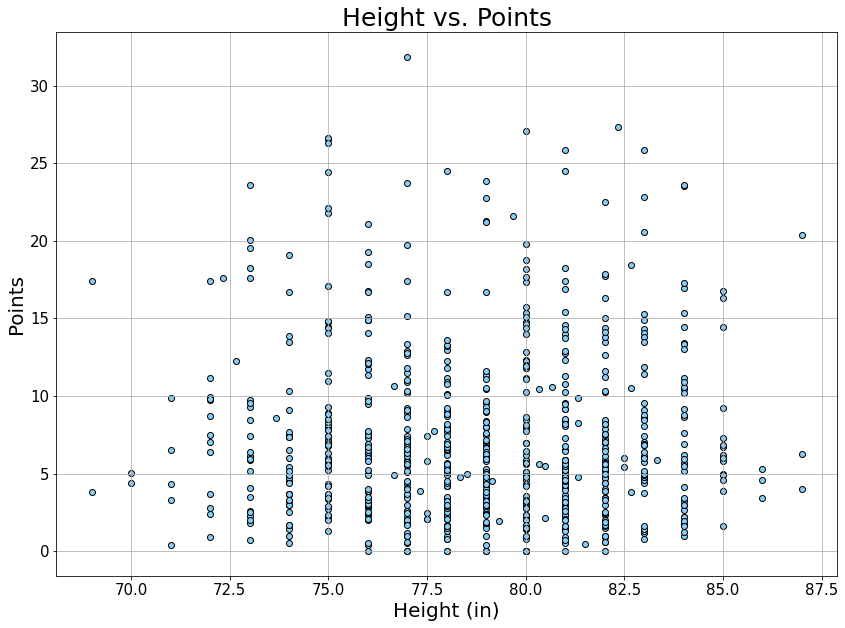

<Figure size 432x288 with 0 Axes>

In [20]:
# Set up then call the function show_scatter using Height and Points
figure1 = plt.figure(figsize=(14,10))

plot_title = "Height vs. Points"
x_label_name = "Height (in)"
y_label_name = "Points"
face = "lightskyblue"
edge = "black"
alpha_value = 1
show_scatter(1, 2)


In [29]:
def calc_linear_reg_show_scatter(x_col, y_col):
    x_limit = 90
    x_axis = x_axis = np.arange(66, x_limit, 3)
    
    tick_locations = []
    for x in x_axis:
        tick_locations.append(x)
    
    x_values = nba_stats_df.iloc[:,x_col]
    y_values = nba_stats_df.iloc[:,y_col]
    
    correlation = stats.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge, alpha=alpha_value)
    
    plt.title(plot_title, size=25)
    plt.xlabel(x_label_name, size=20)
    plt.ylabel(y_label_name, size=20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
       
    
    # For linear regression line, calculate the values and plot the line
    height_slope, height_int, height_r, height_p, height_std_err = stats.linregress(x_values, y_values)
    line_fit = height_slope * x_values + height_int 

    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(height_slope,height_int))
    plt.legend(fontsize=20)

    # Print analysis details
    round_correlation = round(correlation[0], 3)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')

    plt.show()
    plt.tight_layout()

pearsonr results: (-0.017377411665314996, 0.6351390828365829).
The correlation between these two factors is -0.017.


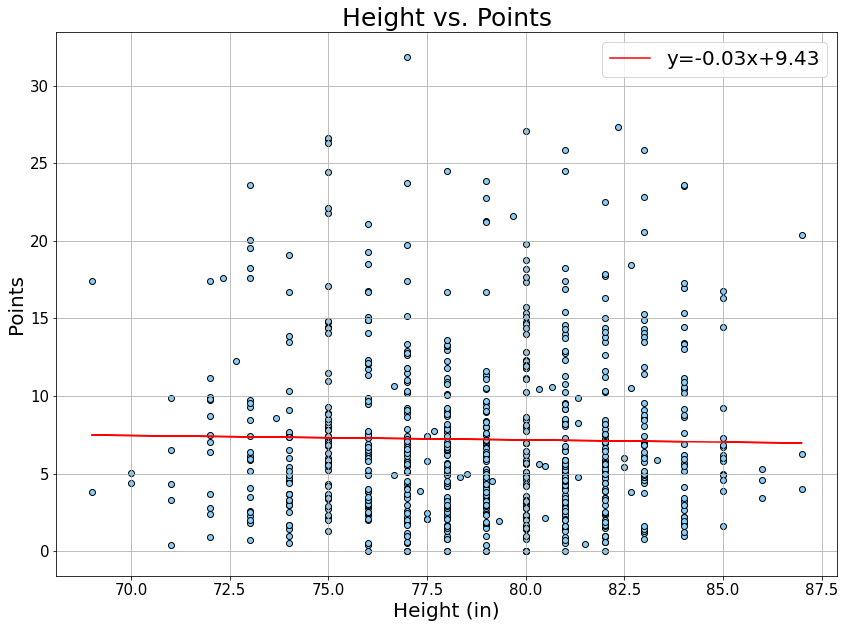

<Figure size 432x288 with 0 Axes>

In [30]:
# Set up then call the function show_scatter using Height and Points
figure1_lin = plt.figure(figsize=(14,10))

plot_title = "Height vs. Points"
x_label_name = "Height (in)"
y_label_name = "Points"
face = "lightskyblue"
edge = "black"
alpha_value = 1

calc_linear_reg_show_scatter(1, 2)


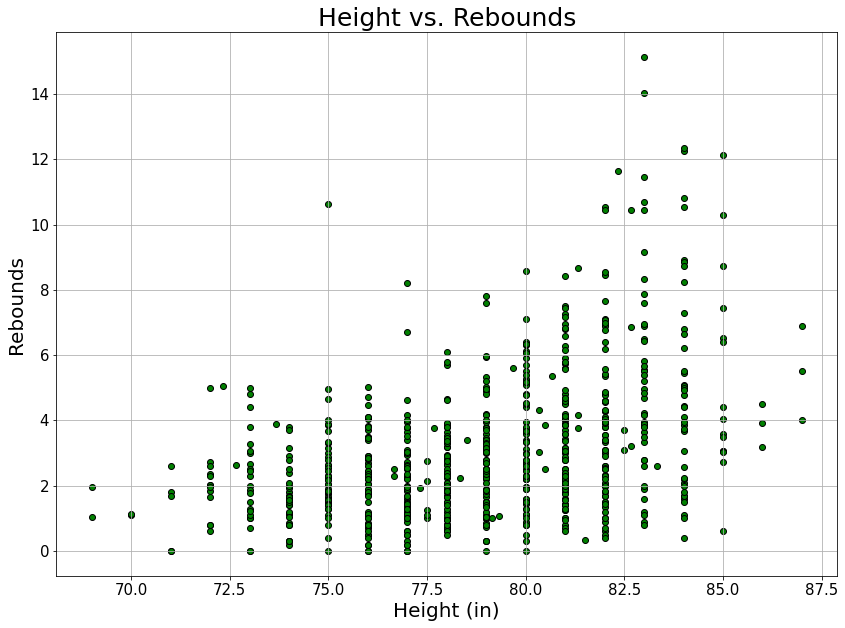

<Figure size 432x288 with 0 Axes>

In [32]:
# Set up then call the function show_scatter using Height and Rebounds
figure2 = plt.figure(figsize=(14,10))

plot_title = "Height vs. Rebounds"
x_label_name = "Height (in)"
y_label_name = "Rebounds"
face = "green"
edge = "black"
alpha_value = 1
show_scatter(1, 3)


In [ ]:
# Set up then call the function show_scatter using Height and Assists
figure3 = plt.figure(figsize=(14,10))

plot_title = "Height vs. Assists"
x_label_name = "Height (in)"
y_label_name = "Assists"
face = "purple"
edge = "black"
alpha_value = .80
show_scatter(1, 4)

In [ ]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(64, x_limit, 2)

figure2 = plt.figure(figsize=(25,14))

plt.bar(nba_stats_df['height (in)'], nba_stats_df['pts'], color='lightskyblue', alpha=.80, align="center")
plt.title('Height vs. Points')
plt.xlabel('Height (in)')
plt.ylabel('Points')

plt.grid()
plt.show()
plt.tight_layout()

In [ ]:

# for a function that includes the linear regression
def northern_calc_and_show_plot(x_col, y_col):
    x_values = northern_weather_df.iloc[:,x_col]
    y_values = northern_weather_df.iloc[:,y_col]
    
    # Calc of the pearsonr correlation
    correlation = sts.pearsonr(x_values, y_values)
    
    # Create the plot when the function is called
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge)
    
    # Updates to title/labels for the plot
    plt.title(plot_title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.grid()
    
    # For linear regression line, calculate the values and plot the line
    lat_vs_slope, lat_vs_int, lat_vs_r, lat_vs_p, lat_vs_std_err = stats.linregress(x_values, y_values)
    line_fit = lat_vs_slope * x_values + lat_vs_int 
 
    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(lat_vs_slope,lat_vs_int))
    plt.legend(fontsize=10)
    
    # Print analysis details
    round_correlation = round(correlation[0], 2)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')
    
    plt.show()    

In [ ]:
# Save and display the chart
plt.savefig("../Images/avg_temp.png")
plt.show()